In [5]:
import sys
print("✅ Kernel working from:", sys.executable)


✅ Kernel working from: j:\Asad-Learning\Python-Learning\.venv\Scripts\python.exe


📏  Data Cleaning & Preprocessing
✅ Goal: Get messy data into usable format

Data types, conversions

Remove duplicates, nulls

Normalize values (upper/lower case, trims)

Date parsing and conversion

📌 Almost 70% of data engineer work = cleaning data.

✅ 1. Load the Dataset

In [15]:
import pandas as pd

url = "https://datahub.io/core/population/r/population.csv"
df = pd.read_csv(url)
df.head()


,Country Name,Country Code,Year,Value
0,Aruba,ABW,1960,54922.0
1,Aruba,ABW,1961,55578.0
2,Aruba,ABW,1962,56320.0
3,Aruba,ABW,1963,57002.0
4,Aruba,ABW,1964,57619.0


🧠 2. Understand the Dataset
✅ Basic Info:

In [7]:
# df.info()
# df.shape
# df.describe()
# df.columns
# df.dtypes


🔍 3. Handling Missing Values



🔹 Drop missing rows
dropna(): Drops rows (by default) that contain any NaN (missing) values.

inplace=True: Means the change is applied directly to the DataFrame df.

In [8]:
# 🔹 Check for missing:

df.isnull().sum()
    
# df.dropna(inplace=True)


Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

Step 3: Inspect Missing Rows (if any)

In [9]:
df[df.isnull().any(axis=1)].head()

,Country Name,Country Code,Year,Value


🧽 4. Removing Duplicates

In [10]:
df.drop_duplicates(inplace=True)

🧼 5. Cleaning Column Names

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

🔄 Step 6: Changing Data Types in Pandas
Changing (or converting) data types is important because:

It saves memory 💾

Enables correct analysis (e.g., sorting dates or aggregating numbers)

Helps with time-series processing 🕒

Let’s go step-by-step using your population dataset.

✅ 1. Check Current Data Types

In [12]:
df.dtypes


country_name     object
country_code     object
year              int64
value           float64
dtype: object

✅ 2. Change Year to datetime (if needed)
By default, Year is an integer. Sometimes we want it as a datetime if we’re doing time-based indexing or plotting.

In [13]:
df['Year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
# errors='coerce' will safely turn invalid values into NaT (Not a Time) instead of crashing.
df["year"]

0        1960
1        1961
2        1962
3        1963
4        1964
         ... 
16925    2019
16926    2020
16927    2021
16928    2022
16929    2023
Name: year, Length: 16930, dtype: int64

In [ ]:
df.dtypes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16930 entries, 0 to 16929
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   country_name  16930 non-null  object        
 1   country_code  16930 non-null  object        
 2   year          16930 non-null  int64         
 3   value         16930 non-null  float64       
 4   Year          16930 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 661.5+ KB


✅ You Have Two Options Now:
🔹 Option 1: Drop the old 'year' column
If you only want to use the datetime version:
df.drop(columns=['year'], inplace=True)
🔹 Option 2: Rename 'Year' to 'year' (overwrite original)

In [ ]:
df['year']=pd.to_datetime(df['year'],format='%Y')
df.drop(columns=['year'],inplace=True)

✅ Confirm Everything

In [ ]:
df.info()


✅ Convert datetime64[ns] to year as int64

In [16]:
df.columns


Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [17]:
# Correct command based on your column
df['Year'] = df['Year'].dt.year

# Optional: check dtype
df.dtypes


AttributeError: Can only use .dt accessor with datetimelike values

✂️ Step 7: String Cleaning with Pandas
String issues like inconsistent casing, extra spaces, typos, or duplicate names (like " India " vs "india") can break your analysis.

We'll clean strings in the country_name column from your dataset.

✅ 1. Check Unique Values Before Cleaning
To see messy country names:



In [18]:
df['country_name'].unique()[:10]

KeyError: 'country_name'

🧼 2. Clean the Text Step-by-Step

In [ ]:
df['country_name']=(
    df['country_name'].astype(str).str.strip().str.lower().str.title()
)

In [19]:
df['country_name'].unique()[:10]


KeyError: 'country_name'

🧱 8. Handling Outliers (basic)

Cap salary at 95th percentile
df['salary'] = df['salary'].clip(upper=df['salary'].quantile(0.95)) 

✨ Optional Fix: Handle Duplicates Like “US” vs “United States”

If your dataset includes synonyms (like "USA", "United States"), you can manually map them:



country_fix = {
    "Usa": "United States",
    "U.S.A.": "United States",
    "Uk": "United Kingdom"
    
}

df['country_name'] = df['country_name'].replace(country_fix)


****************************************
📆 9. Date and Time Cleaning


Date time cleaning using 🌦️ Weekly Weather Data (2016)

In [20]:
import pandas as pd 


url="https://corgis-edu.github.io/corgis/datasets/csv/weather/weather.csv"

dfw=pd.read_csv(url)

dfw.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [3]:
dfw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data.Precipitation         16743 non-null  float64
 1   Date.Full                  16743 non-null  object 
 2   Date.Month                 16743 non-null  int64  
 3   Date.Week of               16743 non-null  int64  
 4   Date.Year                  16743 non-null  int64  
 5   Station.City               16743 non-null  object 
 6   Station.Code               16743 non-null  object 
 7   Station.Location           16743 non-null  object 
 8   Station.State              16743 non-null  object 
 9   Data.Temperature.Avg Temp  16743 non-null  int64  
 10  Data.Temperature.Max Temp  16743 non-null  int64  
 11  Data.Temperature.Min Temp  16743 non-null  int64  
 12  Data.Wind.Direction        16743 non-null  int64  
 13  Data.Wind.Speed            16743 non-null  flo

In [22]:
dfw.columns.tolist()


['Data.Precipitation',
 'Date.Full',
 'Date.Month',
 'Date.Week of',
 'Date.Year',
 'Station.City',
 'Station.Code',
 'Station.Location',
 'Station.State',
 'Data.Temperature.Avg Temp',
 'Data.Temperature.Max Temp',
 'Data.Temperature.Min Temp',
 'Data.Wind.Direction',
 'Data.Wind.Speed']

In [23]:
dfw.dtypes

Data.Precipitation           float64
Date.Full                     object
Date.Month                     int64
Date.Week of                   int64
Date.Year                      int64
Station.City                  object
Station.Code                  object
Station.Location              object
Station.State                 object
Data.Temperature.Avg Temp      int64
Data.Temperature.Max Temp      int64
Data.Temperature.Min Temp      int64
Data.Wind.Direction            int64
Data.Wind.Speed              float64
dtype: object

In [24]:
dfw['date'] = pd.to_datetime(dfw['Date.Full'], format='%Y-%m-%d')
dfw['date'].head()




0   2016-01-03
1   2016-01-03
2   2016-01-03
3   2016-01-03
4   2016-01-03
Name: date, dtype: datetime64[ns]

In [10]:
dfw['date'] = pd.to_datetime(dfw['Date.Full'], format='%Y-%m-%d')
dfw['year']  = dfw['date'].dt.year
dfw['month'] = dfw['date'].dt.month
dfw['week']  = dfw['date'].dt.isocalendar().week
dfw[['Date.Full', 'date', 'year', 'month', 'week']].head(3)


,Date.Full,date,year,month,week
0,2016-01-03,2016-01-03,2016,1,53
1,2016-01-03,2016-01-03,2016,1,53
2,2016-01-03,2016-01-03,2016,1,53


In [25]:
dfw.dtypes

Data.Precipitation                  float64
Date.Full                            object
Date.Month                            int64
Date.Week of                          int64
Date.Year                             int64
Station.City                         object
Station.Code                         object
Station.Location                     object
Station.State                        object
Data.Temperature.Avg Temp             int64
Data.Temperature.Max Temp             int64
Data.Temperature.Min Temp             int64
Data.Wind.Direction                   int64
Data.Wind.Speed                     float64
date                         datetime64[ns]
dtype: object

In [9]:
dfw[['date', 'year', 'month', 'week']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16743 non-null  datetime64[ns]
 1   year    16743 non-null  int32         
 2   month   16743 non-null  int32         
 3   week    16743 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(2)
memory usage: 343.5 KB


✅ 1. Filter Specific Year or Month

In [6]:
dfw[dfw['month'] == 7]

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed,date,year,month,week
8209,0.00,2016-07-03,7,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,84,97,70,27,3.50,2016-07-03,2016,7,26
8210,0.06,2016-07-03,7,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,82,95,68,28,3.00,2016-07-03,2016,7,26
8211,0.00,2016-07-03,7,3,2016,Mobile,MOB,"Mobile, AL",Alabama,84,94,74,24,3.86,2016-07-03,2016,7,26
8212,0.00,2016-07-03,7,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,86,99,72,23,2.76,2016-07-03,2016,7,26
8213,0.35,2016-07-03,7,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,59,63,55,23,2.80,2016-07-03,2016,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,0.16,2016-07-31,7,31,2016,Casper,CPR,"Casper, WY",Wyoming,73,92,53,14,5.88,2016-07-31,2016,7,30
9777,0.43,2016-07-31,7,31,2016,Cheyenne,CYS,"Cheyenne, WY",Wyoming,71,85,56,17,5.28,2016-07-31,2016,7,30
9778,0.00,2016-07-31,7,31,2016,Lander,LND,"Lander, WY",Wyoming,75,92,58,27,2.87,2016-07-31,2016,7,30
9779,0.00,2016-07-31,7,31,2016,Rawlins,RWL,"Rawlins, WY",Wyoming,70,89,50,20,6.15,2016-07-31,2016,7,30


In [11]:
dfw[dfw['year'] == 2017] 


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed,date,year,month,week
16426,0.51,2017-01-01,1,1,2017,Birmingham,BHM,"Birmingham, AL",Alabama,54,64,45,22,6.28,2017-01-01,2017,1,52
16427,1.57,2017-01-01,1,1,2017,Huntsville,HSV,"Huntsville, AL",Alabama,52,62,41,23,7.10,2017-01-01,2017,1,52
16428,1.72,2017-01-01,1,1,2017,Mobile,MOB,"Mobile, AL",Alabama,62,71,53,22,6.33,2017-01-01,2017,1,52
16429,0.62,2017-01-01,1,1,2017,Montgomery,MGM,"Montgomery, AL",Alabama,58,69,47,21,4.66,2017-01-01,2017,1,52
16430,0.52,2017-01-01,1,1,2017,Anchorage,ANC,"Anchorage, AK",Alaska,20,27,12,7,2.45,2017-01-01,2017,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98,2017-01-01,2017,1,52
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16,2017-01-01,2017,1,52
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65,2017-01-01,2017,1,52
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16,2017-01-01,2017,1,52


In [14]:
df_filtered = dfw[(dfw['year'] == 2016) & (dfw['month'] == 7)]
df_filtered.head(5)

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed,date,year,month,week
8209,0.00,2016-07-03,7,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,84,97,70,27,3.50,2016-07-03,2016,7,26
8210,0.06,2016-07-03,7,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,82,95,68,28,3.00,2016-07-03,2016,7,26
8211,0.00,2016-07-03,7,3,2016,Mobile,MOB,"Mobile, AL",Alabama,84,94,74,24,3.86,2016-07-03,2016,7,26
8212,0.00,2016-07-03,7,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,86,99,72,23,2.76,2016-07-03,2016,7,26
8213,0.35,2016-07-03,7,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,59,63,55,23,2.80,2016-07-03,2016,7,26


In [22]:
dfw.dtypes

Data.Precipitation                  float64
Date.Full                            object
Date.Month                            int64
Date.Week of                          int64
Date.Year                             int64
Station.City                         object
Station.Code                         object
Station.Location                     object
Station.State                        object
Data.Temperature.Avg Temp             int64
Data.Temperature.Max Temp             int64
Data.Temperature.Min Temp             int64
Data.Wind.Direction                   int64
Data.Wind.Speed                     float64
date                         datetime64[ns]
year                                  int32
month                                 int32
week                                 UInt32
dtype: object

In [29]:
# dfw.select_dtypes(include='int').columns
# dfw.select_dtypes(include='float').columns
# dfw.select_dtypes(include='datetime').columns
dfw.select_dtypes(include='object').columns



Index(['Date.Full', 'Station.City', 'Station.Code', 'Station.Location',
       'Station.State'],
      dtype='object')

In [30]:
# change data type of year prectice float to int

dfw['year'] = dfw['year'].astype(float)
dfw['year'].dtype
dfw['year'] = dfw['year'].astype(int)
dfw['year'].dtype


dtype('int64')

In [38]:
dfw.select_dtypes(include='int').columns


Index(['Date.Month', 'Date.Week of', 'Date.Year', 'Data.Temperature.Avg Temp',
       'Data.Temperature.Max Temp', 'Data.Temperature.Min Temp',
       'Data.Wind.Direction', 'year', 'month'],
      dtype='object')

In [26]:
# dfw['Station.State'].info
# dfw['year'].info
dfw['Station.City'].info

<bound method Series.info of 0        Birmingham
1        Huntsville
2            Mobile
3        Montgomery
4         Anchorage
            ...    
16738        Casper
16739      Cheyenne
16740        Lander
16741       Rawlins
16742      Sheridan
Name: Station.City, Length: 16743, dtype: object>

In [40]:
dfw.dtypes


Data.Precipitation                  float64
Date.Full                            object
Date.Month                            int64
Date.Week of                          int64
Date.Year                             int64
Station.City                         object
Station.Code                         object
Station.Location                     object
Station.State                        object
Data.Temperature.Avg Temp             int64
Data.Temperature.Max Temp             int64
Data.Temperature.Min Temp             int64
Data.Wind.Direction                   int64
Data.Wind.Speed                     float64
date                         datetime64[ns]
year                                  int64
month                                 int32
week                                 UInt32
dtype: object

In [41]:
dfw.columns.tolist()

['Data.Precipitation',
 'Date.Full',
 'Date.Month',
 'Date.Week of',
 'Date.Year',
 'Station.City',
 'Station.Code',
 'Station.Location',
 'Station.State',
 'Data.Temperature.Avg Temp',
 'Data.Temperature.Max Temp',
 'Data.Temperature.Min Temp',
 'Data.Wind.Direction',
 'Data.Wind.Speed',
 'date',
 'year',
 'month',
 'week']

In [44]:
dfw['state_encoded'] = dfw['Station.State'].astype('category').cat.codes
dfw[['state_encoded','Station.State']].head(10)

,state_encoded,Station.State
0,0,Alabama
1,0,Alabama
2,0,Alabama
3,0,Alabama
4,1,Alaska
5,1,Alaska
6,1,Alaska
7,1,Alaska
8,1,Alaska
9,1,Alaska


✅ Step 3: Plot the Encoding (Optional) You can plot how often each state encoding appears:
# Seaborn's countplot plots counts of unique values in a column.
x="state_encoded": plot the counts for the state_encoded column (the encoded state names).

order=dfw['state_encoded'].value_counts().index: shows bars in order of frequency (most common on the left).



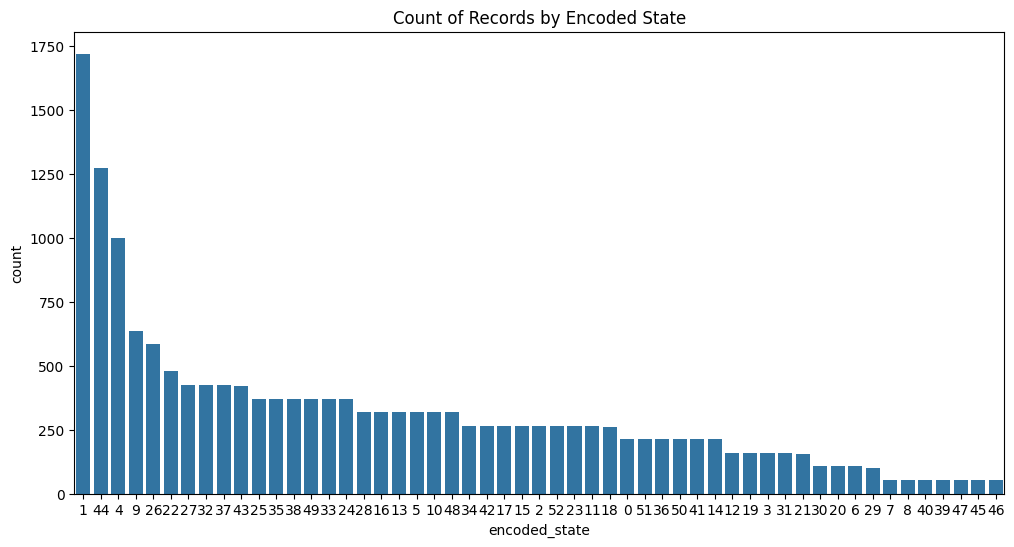

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data = dfw, x='state_encoded', order=dfw['state_encoded'].value_counts().index)
plt.title('Count of Records by Encoded State')
plt.xlabel('encoded_state')
plt.ylabel('count')
plt.show()


In [32]:
dfw.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed,date,year,month,week
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33,2016-01-03,2016,1,53
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86,2016-01-03,2016,1,53
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73,2016-01-03,2016,1,53
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86,2016-01-03,2016,1,53
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80,2016-01-03,2016,1,53


✅ Step 4 (Optional): View Encoding Mapping
To understand which code maps to which state:

In [34]:
# state_mapping=dict(enumerate(dfw['Station.State'].astype('category').cat.codes))
# state_mapping = dict(enumerate(dfw['Station.State'].astype('category').cat.categories))
state_mapping = dict(zip(dfw['Station.State'].astype('category').cat.codes, dfw['Station.State']))


state_mapping

{0: 'Alabama', 1: 'Alaska', 2: 'Arizona', 3: 'Arkansas', 4: 'California', 5: 'Colorado', 6: 'Connecticut', 7: 'DE', 8: 'Delaware', 9: 'Florida', 10: 'Georgia', 11: 'Hawaii', 12: 'Idaho', 13: 'Illinois', 14: 'Indiana', 15: 'Iowa', 16: 'Kansas', 17: 'Kentucky', 18: 'Louisiana', 19: 'Maine', 20: 'Maryland', 21: 'Massachusetts', 22: 'Michigan', 23: 'Minnesota', 24: 'Mississippi', 25: 'Missouri', 26: 'Montana', 27: 'Nebraska', 28: 'Nevada', 29: 'New Hampshire', 30: 'New Jersey', 31: 'New Mexico', 32: 'New York', 33: 'North Carolina', 34: 'North Dakota', 35: 'Ohio', 36: 'Oklahoma', 37: 'Oregon', 38: 'Pennsylvania', 39: 'Puerto Rico', 40: 'Rhode Island', 41: 'South Carolina', 42: 'South Dakota', 43: 'Tennessee', 44: 'Texas', 45: 'Utah', 46: 'VA', 47: 'Vermont', 48: 'Virginia', 49: 'Washington', 50: 'West Virginia', 51: 'Wisconsin', 52: 'Wyoming'}


{0: 'Alabama',
 1: 'Alaska',
 2: 'Arizona',
 3: 'Arkansas',
 4: 'California',
 5: 'Colorado',
 6: 'Connecticut',
 7: 'DE',
 8: 'Delaware',
 9: 'Florida',
 10: 'Georgia',
 11: 'Hawaii',
 12: 'Idaho',
 13: 'Illinois',
 14: 'Indiana',
 15: 'Iowa',
 16: 'Kansas',
 17: 'Kentucky',
 18: 'Louisiana',
 19: 'Maine',
 20: 'Maryland',
 21: 'Massachusetts',
 22: 'Michigan',
 23: 'Minnesota',
 24: 'Mississippi',
 25: 'Missouri',
 26: 'Montana',
 27: 'Nebraska',
 28: 'Nevada',
 29: 'New Hampshire',
 30: 'New Jersey',
 31: 'New Mexico',
 32: 'New York',
 33: 'North Carolina',
 34: 'North Dakota',
 35: 'Ohio',
 36: 'Oklahoma',
 37: 'Oregon',
 38: 'Pennsylvania',
 39: 'Puerto Rico',
 40: 'Rhode Island',
 41: 'South Carolina',
 42: 'South Dakota',
 43: 'Tennessee',
 44: 'Texas',
 45: 'Utah',
 46: 'VA',
 47: 'Vermont',
 48: 'Virginia',
 49: 'Washington',
 50: 'West Virginia',
 51: 'Wisconsin',
 52: 'Wyoming'}

✅ Convert a Single Row to Dict

In [36]:
dfw.iloc[0].to_dict()

{'Data.Precipitation': 0.0,
 'Date.Full': '2016-01-03',
 'Date.Month': 1,
 'Date.Week of': 3,
 'Date.Year': 2016,
 'Station.City': 'Birmingham',
 'Station.Code': 'BHM',
 'Station.Location': 'Birmingham, AL',
 'Station.State': 'Alabama',
 'Data.Temperature.Avg Temp': 39,
 'Data.Temperature.Max Temp': 46,
 'Data.Temperature.Min Temp': 32,
 'Data.Wind.Direction': 33,
 'Data.Wind.Speed': 4.33,
 'date': Timestamp('2016-01-03 00:00:00'),
 'year': 2016,
 'month': 1,
 'week': 53}

✅ Convert Columns as Keys and Values as Lists (Column-wise)


In [37]:
dfw.head().to_dict(orient='list')


{'Data.Precipitation': [0.0, 0.0, 0.16, 0.0, 0.01],
 'Date.Full': ['2016-01-03',
  '2016-01-03',
  '2016-01-03',
  '2016-01-03',
  '2016-01-03'],
 'Date.Month': [1, 1, 1, 1, 1],
 'Date.Week of': [3, 3, 3, 3, 3],
 'Date.Year': [2016, 2016, 2016, 2016, 2016],
 'Station.City': ['Birmingham',
  'Huntsville',
  'Mobile',
  'Montgomery',
  'Anchorage'],
 'Station.Code': ['BHM', 'HSV', 'MOB', 'MGM', 'ANC'],
 'Station.Location': ['Birmingham, AL',
  'Huntsville, AL',
  'Mobile, AL',
  'Montgomery, AL',
  'Anchorage, AK'],
 'Station.State': ['Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alaska'],
 'Data.Temperature.Avg Temp': [39, 39, 46, 45, 34],
 'Data.Temperature.Max Temp': [46, 47, 51, 52, 38],
 'Data.Temperature.Min Temp': [32, 31, 41, 38, 29],
 'Data.Wind.Direction': [33, 32, 35, 32, 19],
 'Data.Wind.Speed': [4.33, 3.86, 9.73, 6.86, 7.8],
 'date': [Timestamp('2016-01-03 00:00:00'),
  Timestamp('2016-01-03 00:00:00'),
  Timestamp('2016-01-03 00:00:00'),
  Timestamp('2016-01-03 00:00:00'),
 

In [39]:
mapping_dict = dfw.set_index('Station.State')['Station.Code'].to_dict()
print(mapping_dict)


{'Alabama': 'MGM', 'Alaska': 'YAK', 'Arizona': 'INW', 'Arkansas': 'LZK', 'California': 'SCK', 'Colorado': 'PUB', 'Connecticut': 'BDL', 'DE': 'NWK', 'Delaware': 'ILG', 'Florida': 'PBI', 'Georgia': 'SAV', 'Hawaii': 'LIH', 'Idaho': 'PIH', 'Illinois': 'SPI', 'Indiana': 'SBN', 'Iowa': 'ALO', 'Kansas': 'ICT', 'Kentucky': 'PAH', 'Louisiana': 'ASD', 'Maine': 'PWM', 'Maryland': 'SBY', 'Massachusetts': 'ORH', 'Michigan': 'ANJ', 'Minnesota': 'STC', 'Mississippi': 'TUP', 'Missouri': 'STL', 'Montana': 'MSO', 'Nebraska': 'VTN', 'Nevada': 'WMC', 'New Hampshire': 'MWN', 'New Jersey': 'EWR', 'New Mexico': 'ROW', 'New York': 'SYR', 'North Carolina': 'ILM', 'North Dakota': 'ISN', 'Ohio': 'YNG', 'Oklahoma': 'TUL', 'Oregon': 'SLE', 'Pennsylvania': 'IPT', 'Puerto Rico': 'SJU', 'Rhode Island': 'PVD', 'South Carolina': 'GSP', 'South Dakota': 'FSD', 'Tennessee': 'OQT', 'Texas': 'SPS', 'Utah': 'SLC', 'VA': 'BCB', 'Vermont': 'BTV', 'Virginia': 'DCA', 'Washington': 'YKM', 'West Virginia': 'HTS', 'Wisconsin': 'MKE

✅ 2. Map One Column Using That Dictionary
Let’s say you want to map 'Station.State' using that dictionary into a new column:

In [40]:
# focus on mapping 
dfw['state_code_mapped']=dfw['Station.State'].map(mapping_dict)
print(dfw['state_code_mapped'])

0        MGM
1        MGM
2        MGM
3        MGM
4        YAK
        ... 
16738    SHR
16739    SHR
16740    SHR
16741    SHR
16742    SHR
Name: state_code_mapped, Length: 16743, dtype: object


🧩 10. Encoding Categorical Data
Label Encoding:




df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

✅ Why use it?
Most machine learning models and statistical functions cannot work with text/categorical data — they need numbers.
pd.get_dummies() helps by turning each category into its own column, with 0 or 1 indicating presence or absence.

In [3]:
dfw = pd.get_dummies(dfw,columns=['Data.Precipitation'], drop_first=True)

In [4]:
[dfw for dfw in dfw.columns if 'Data.Precipitation' in dfw.lower()]


[]

🧪 11. Applying Custom Functions


🔹 What are Custom Functions?
Custom functions are user-defined Python functions that you apply to a DataFrame column (or row) using .apply() or .map().

✅ Example 1: Apply function to a column
Let’s say your dfw DataFrame has a column 'avg_temp' in Celsius, and you want to convert it to Fahrenheit.

🔁 Step-by-step:
Convert units (C → F)	apply() with math

In [5]:
# Step 1: Define a function
def celsius_to_fahrenheit(c):
    return c * 9/5 + 32

# Step 2: Apply it to the column
dfw['temp_c'] = dfw['Data.Temperature.Avg Temp'].apply(celsius_to_fahrenheit)
dfw[['Data.Temperature.Avg Temp', 'temp_c']].head()


,Data.Temperature.Avg Temp,temp_c
0,39,102.2
1,39,102.2
2,46,114.8
3,45,113.0
4,34,93.2


OR even better (to make your life easier), rename it:

In [8]:
dfw.rename(columns={
    'Data.Temperature.Avg Temp': 'avg_temp'
}, inplace=True)

# Now use the new short name
dfw['avg_temp'].mean()
# take info of 'Data.Temperature.Avg Temp'
dfw['avg_temp'].info()
print(dfw.columns)



<class 'pandas.core.series.Series'>
RangeIndex: 16743 entries, 0 to 16742
Series name: avg_temp
Non-Null Count  Dtype
--------------  -----
16743 non-null  int64
dtypes: int64(1)
memory usage: 130.9 KB
Index(['Date.Full', 'Date.Month', 'Date.Week of', 'Date.Year', 'Station.City',
       'Station.Code', 'Station.Location', 'Station.State', 'avg_temp',
       'Data.Temperature.Max Temp',
       ...
       'Data.Precipitation_10.49', 'Data.Precipitation_10.58',
       'Data.Precipitation_11.52', 'Data.Precipitation_12.02',
       'Data.Precipitation_12.65', 'Data.Precipitation_13.36',
       'Data.Precipitation_14.03', 'Data.Precipitation_15.19',
       'Data.Precipitation_20.89', 'temp_c'],
      dtype='object', length=578)


In [11]:
for col in dfw.columns:
    print(f"'{col}'")

'Date.Full'
'Date.Month'
'Date.Week of'
'Date.Year'
'Station.City'
'Station.Code'
'Station.Location'
'Station.State'
'avg_temp'
'Data.Temperature.Max Temp'
'Data.Temperature.Min Temp'
'Data.Wind.Direction'
'Data.Wind.Speed'
'Data.Precipitation_0.01'
'Data.Precipitation_0.02'
'Data.Precipitation_0.03'
'Data.Precipitation_0.04'
'Data.Precipitation_0.05'
'Data.Precipitation_0.06'
'Data.Precipitation_0.07'
'Data.Precipitation_0.08'
'Data.Precipitation_0.09'
'Data.Precipitation_0.1'
'Data.Precipitation_0.11'
'Data.Precipitation_0.12'
'Data.Precipitation_0.13'
'Data.Precipitation_0.14'
'Data.Precipitation_0.15'
'Data.Precipitation_0.16'
'Data.Precipitation_0.17'
'Data.Precipitation_0.18'
'Data.Precipitation_0.19'
'Data.Precipitation_0.2'
'Data.Precipitation_0.21'
'Data.Precipitation_0.22'
'Data.Precipitation_0.23'
'Data.Precipitation_0.24'
'Data.Precipitation_0.25'
'Data.Precipitation_0.26'
'Data.Precipitation_0.27'
'Data.Precipitation_0.28'
'Data.Precipitation_0.29'
'Data.Precipitation_0.3'

✅ Example 2: Create a temperature category (custom labeling) 
Create new categories	apply() with if-else

In [12]:
def label_temp(c):
    if c < 10:
        return 'cold'
    elif c < 25:
        return 'moderate'
    else:
        return 'Hot'
    
dfw['temp_label']= dfw['Data.Temperature.Avg Temp'].apply(label_temp)    
dfw[['Data.Temperature.Avg Temp', 'temp_label']].head()
dfw['temp_label'].value_counts()



KeyError: 'Data.Temperature.Avg Temp'

✅ Example 3: Apply a function on multiple columns using axis=1
Suppose you want to create a string like "City-State":
    
Format strings (date, city)	apply() with f-strings    

In [13]:
dfw.columns.tolist()

['Date.Full',
 'Date.Month',
 'Date.Week of',
 'Date.Year',
 'Station.City',
 'Station.Code',
 'Station.Location',
 'Station.State',
 'avg_temp',
 'Data.Temperature.Max Temp',
 'Data.Temperature.Min Temp',
 'Data.Wind.Direction',
 'Data.Wind.Speed',
 'Data.Precipitation_0.01',
 'Data.Precipitation_0.02',
 'Data.Precipitation_0.03',
 'Data.Precipitation_0.04',
 'Data.Precipitation_0.05',
 'Data.Precipitation_0.06',
 'Data.Precipitation_0.07',
 'Data.Precipitation_0.08',
 'Data.Precipitation_0.09',
 'Data.Precipitation_0.1',
 'Data.Precipitation_0.11',
 'Data.Precipitation_0.12',
 'Data.Precipitation_0.13',
 'Data.Precipitation_0.14',
 'Data.Precipitation_0.15',
 'Data.Precipitation_0.16',
 'Data.Precipitation_0.17',
 'Data.Precipitation_0.18',
 'Data.Precipitation_0.19',
 'Data.Precipitation_0.2',
 'Data.Precipitation_0.21',
 'Data.Precipitation_0.22',
 'Data.Precipitation_0.23',
 'Data.Precipitation_0.24',
 'Data.Precipitation_0.25',
 'Data.Precipitation_0.26',
 'Data.Precipitation_0.2

In [14]:
def combine_city_state(row):
    return f"{row['Station.City']} - {row['Station.State']}"
dfw['city_state_combine'] = dfw.apply(combine_city_state, axis=1)
dfw[['Station.City', 'Station.State', 'city_state_combine']].head()

,Station.City,Station.State,city_state_combine
0,Birmingham,Alabama,Birmingham - Alabama
1,Huntsville,Alabama,Huntsville - Alabama
2,Mobile,Alabama,Mobile - Alabama
3,Montgomery,Alabama,Montgomery - Alabama
4,Anchorage,Alaska,Anchorage - Alaska


In [ ]:
🔹 Using .apply() with a custom function
You can also combine multiple string operations in one custom function:

In [15]:
def clean_text(x):
    return x.lower().strip()
dfw['Station.City'] = dfw['Station.City'].apply(clean_text)
dfw['Station.City'].head()

0    birmingham
1    huntsville
2        mobile
3    montgomery
4     anchorage
Name: Station.City, dtype: object

🪛 12. Rename / Reorder / Drop Columns

# renaming
dfw.rename(columns={'Data.Temperature.Max Temp':'max_temp'}, inplace=True)
dfw.head()

dfw = dfw[['Data.Temperature.Avg Temp','Data.Temperature.Min Temp', 'max_temp']]
dfw.head()
# or
dfw[['Data.Temperature.Avg Temp','Data.Temperature.Min Temp', 'max_temp']].head()

# drop old column
# dfw.head()

# dfw.drop(['max_temp'], axis=1, inplace=True)
dfw.head()

dfw.head()

🧠 observe Real-World Example Workflow 

df = pd.read_csv("employees.csv")

# Drop rows with missing name or email
df.dropna(subset=['name', 'email'], inplace=True)

# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Convert salary from string to float
df['salary'] = df['salary'].replace('[\$,]', '', regex=True).astype(float)

# Convert dates
df['joining_date'] = pd.to_datetime(df['joining_date'])

# Clean column names
df.columns = df.columns.str.strip().str.mlower().str.replace(" ", "_")


📈 2. Plot Weekly Temperature or Precipitation

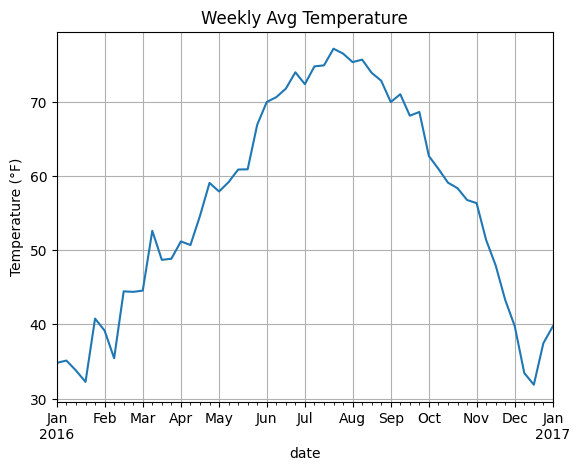

In [14]:


import matplotlib.pyplot as plt
dfw['date'] = pd.to_datetime(dfw['Date.Full'], format='%Y-%m-%d')

dfw.set_index('date', inplace=True)
dfw['avg_temp'].resample('W').mean().plot(title="Weekly Avg Temperature")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.show()


In [15]:
dfw['Station.State'] = dfw['Station.State'].astype('category')


✅ 1. 📊 Average Weekly Temperature Across All Cities

<Axes: title={'center': 'Avg temperature across cities (weekly)'}, xlabel='date'>

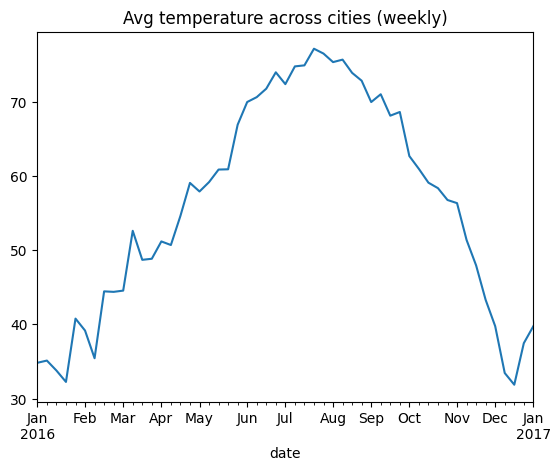

In [16]:
weekly_avg_temp=dfw.groupby('date')['avg_temp'].mean()
weekly_avg_temp.plot(title='Avg temperature across cities (weekly)')

✅ 2. ☔️ Total Weekly Precipitation (All Cities)

<Axes: title={'center': 'Total Weekly Precipitation Across Cities'}, xlabel='date'>

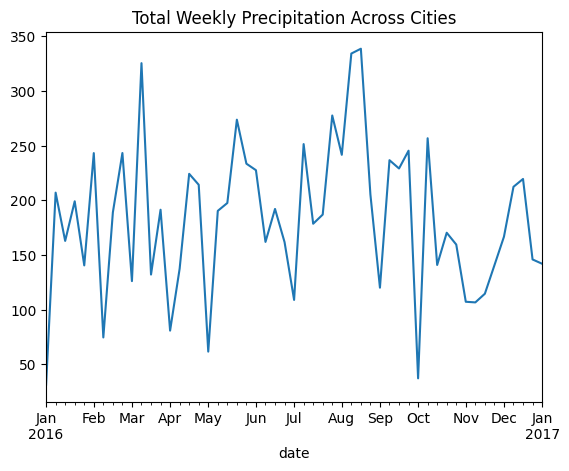

In [17]:
weekly_precipition= dfw.groupby('date')['Data.Precipitation'].sum()
weekly_precipition.plot(title="Total Weekly Precipitation Across Cities")

✅ Option 1: See all unique city names

In [18]:
dfw['Station.City'].unique()


array(['Birmingham', 'Huntsville', 'Mobile', 'Montgomery', 'Anchorage',
       'Annette', 'Bethel', 'Bettles', 'Cold Bay', 'Cordova',
       'Delta Junction/Ft Greely', 'Fairbanks', 'Gulkana', 'Homer',
       'Iliamna', 'Juneau', 'Kenai', 'Ketchikan', 'King Salmon', 'Kodiak',
       'Kotzebue', 'Mc Grath', 'Nome', 'Northway', 'Palmer', 'Petersburg',
       'Puntilla Lake', 'Shemya', 'Sitka', 'Skagway', 'St Paul Island',
       'Talkeetna', 'Tanana', 'Utqiagvik (Barrow)', 'Yakutat',
       'Douglas Bisbee', 'Kingman', 'Phoenix', 'Tucson', 'Winslow',
       'Fort Smith', 'Harrison', 'North Little Rock', 'Bakersfield',
       'Bishop', 'China Lake', 'Concord', 'Eureka', 'Fresno', 'Hayward',
       'Long Beach', 'Los Angeles', 'Red Bluff', 'Redding', 'Sacramento',
       'Salinas', 'San Diego', 'San Francisco', 'Sandberg',
       'Santa Barbara', 'Santa Maria', 'Stockton', 'Alamosa',
       'Colorado Springs', 'Craig', 'Denver', 'Grand Junction', 'Pueblo',
       'Bridgeport', 'Windsor Loc

✅ Option 2: Count how many records per city

In [19]:
dfw['Station.City'].value_counts()


Station.City
Springfield       106
Newark            106
Concord           106
Eureka            106
Wilmington        106
                 ... 
Mt. Washington     47
Milton             47
China Lake         45
Wrangell           30
Unalakleet          5
Name: count, Length: 307, dtype: int64

✅ Option 3: Total cities

In [21]:
dfw['Station.City'].nunique()


307

🔍 Check available column names:

In [22]:
print(dfw.columns.tolist())


['Data.Precipitation', 'Date.Full', 'Date.Month', 'Date.Week of', 'Date.Year', 'Station.City', 'Station.Code', 'Station.Location', 'Station.State', 'avg_temp', 'Data.Temperature.Max Temp', 'Data.Temperature.Min Temp', 'Data.Wind.Direction', 'Data.Wind.Speed', 'year', 'month', 'week']


✅ 3. 🔍 Filter by State or City

'Data.Precipitation'
'Date.Full'
'Date.Month'
'Date.Week of'
'Date.Year'
'Station.City'
'Station.Code'
'Station.Location'
'Station.State'
'avg_temp'
'Data.Temperature.Max Temp'
'Data.Temperature.Min Temp'
'Data.Wind.Direction'
'Data.Wind.Speed'
'year'
'month'
'week'


C:\Users\admin\AppData\Local\Temp\ipykernel_11020\3513105093.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_temp_by_state = dfw.groupby(['month', 'Station.State'])['avg_temp'].mean().unstack()


<Axes: title={'center': 'Monthly Avg Temp by State'}, xlabel='month'>

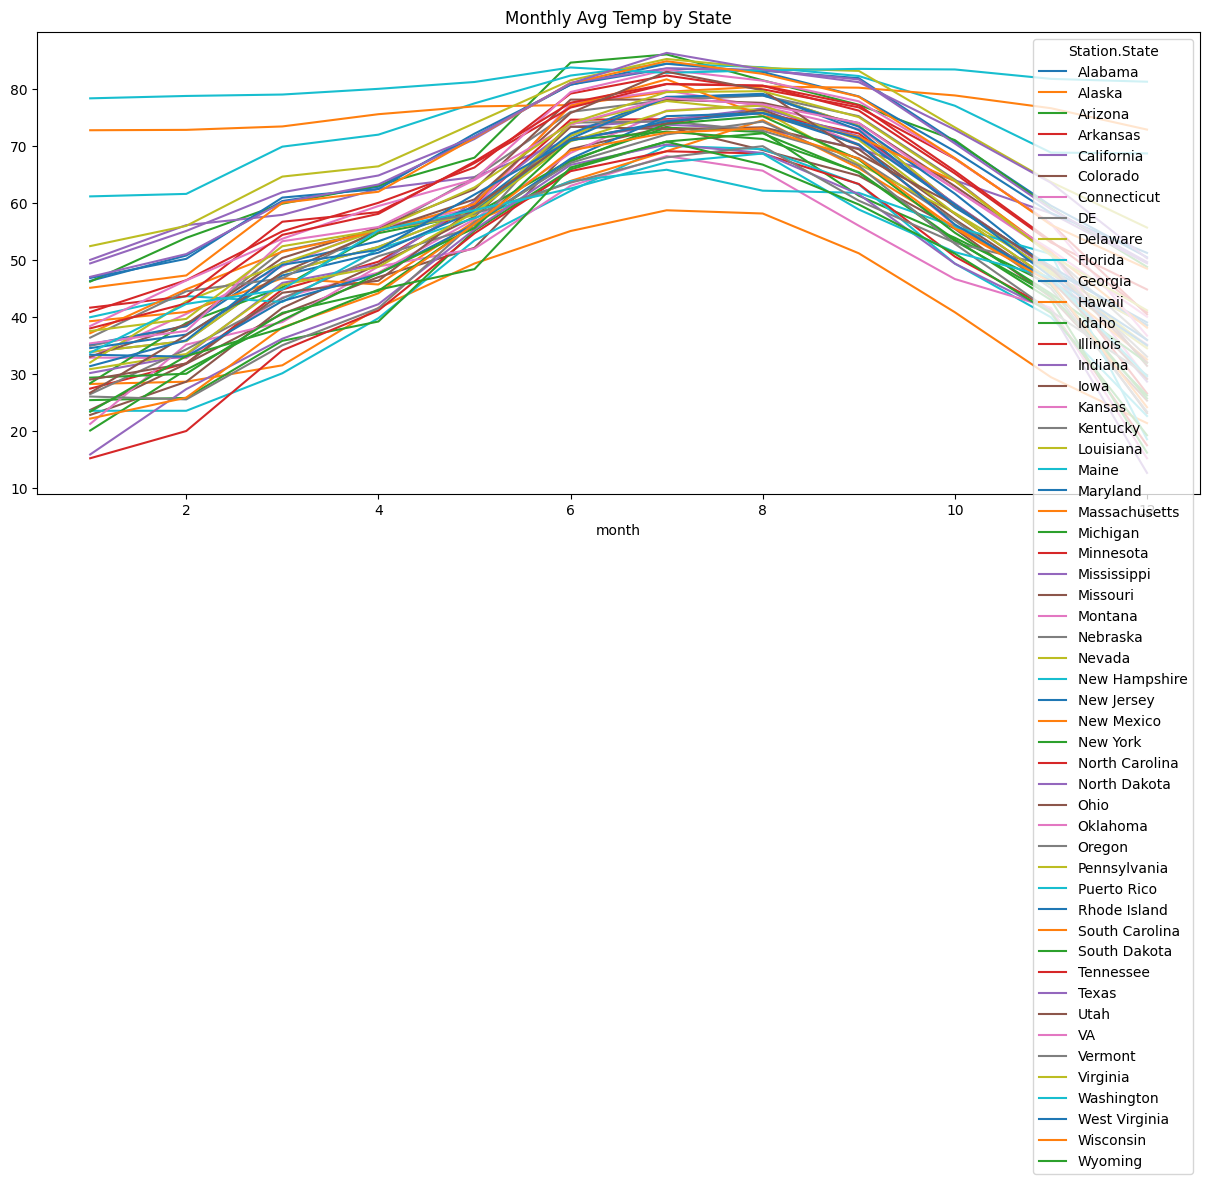

In [23]:
for col in dfw.columns:
     print(f"'{col}'")

dfw[dfw['Station.City'] == 'Taxas']
dfw[dfw['Station.State'] == 'Chicago']

# ✅ 5. 📅 Group by Month or State and Analyze
monthly_temp_by_state = dfw.groupby(['month', 'Station.State'])['avg_temp'].mean().unstack()
monthly_temp_by_state.plot(figsize=(15, 6), title="Monthly Avg Temp by State")

🧩 10. Encoding Categorical Data 
Categorical data are text-based values like "Alabama", "New York", "Rainy", "Sunny", etc., and machines need numbers instead of strings.


✅ Step 1: Identify Categorical Columns
In your dataset, typical categorical columns are:

In [24]:
dfw.select_dtypes(include='object').columns


Index(['Date.Full', 'Station.City', 'Station.Code', 'Station.Location'], dtype='object')

✅ Step 2: Use .astype('category') (optional optimization)
If you're not modeling yet, but want to optimize memory:

In [26]:
dfw['Station.State'] = dfw['Station.State'].astype('category')


✅ Step 3: Label Encoding (Convert categories to numbers)

In [27]:
dfw['state_encoded'] = dfw['Station.State'].astype('category').cat.codes
